## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE = [5, 10, 25]

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""

results = {}

for ptc in PATIENCE:
    earlystop = EarlyStopping(monitor="val_acc",
                              patience=ptc,
                              verbose=1)

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=[earlystop])

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-Earlystop %s" % str(ptc)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0725 20:58:25.676238 15100 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 20:58:25.689307 15100 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 20:58:25.693287 15100 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 20:58:25.732836 15100 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0725 20:58:25.837345 15100 deprecation_wr

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 1s 27us/step - loss: 1.4531 - acc: 0.4911 - val_loss: 1.5826 - val_acc: 0.4468
Epoch 7/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.4132 - acc: 0.5062 - val_loss: 1.5500 - val_acc: 0.4548
Epoch 8/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.3771 - acc: 0.5201 - val_loss: 1.5303 - val_acc: 0.4636
Epoch 9/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.3443 - acc: 0.5312 - val_loss: 1.5066 - val_acc: 0.4741
Epoch 10/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.3135 - acc: 0.5422 - val_loss: 1.5092 - val_acc: 0.4726
Epoch 11/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.2854 - acc: 0.5532 - val_loss: 1.4978 - val_acc: 0.4767
Epoch 12/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.2574 - acc: 0.5628 - val_loss: 1.4871 - val_acc: 0.4758
Epoch 13/50
50000/50000 [========================

Epoch 12/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.2584 - acc: 0.5633 - val_loss: 1.4782 - val_acc: 0.4805
Epoch 13/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.2340 - acc: 0.5710 - val_loss: 1.4756 - val_acc: 0.4805
Epoch 14/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.2081 - acc: 0.5811 - val_loss: 1.4721 - val_acc: 0.4834
Epoch 15/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.1844 - acc: 0.5902 - val_loss: 1.4703 - val_acc: 0.4842
Epoch 16/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.1630 - acc: 0.5998 - val_loss: 1.4683 - val_acc: 0.4908
Epoch 17/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.1402 - acc: 0.6067 - val_loss: 1.4747 - val_acc: 0.4873
Epoch 18/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.1180 - acc: 0.6153 - val_loss: 1.4591 - val_acc: 0.4866
Epoch 19/50
50000/50000 [=========

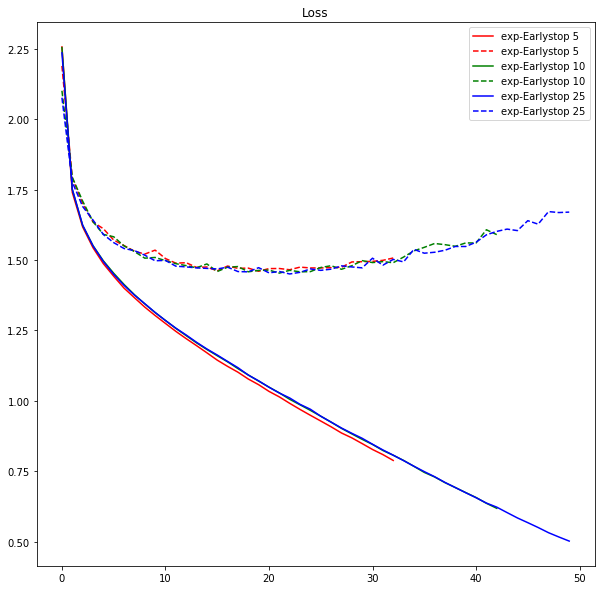

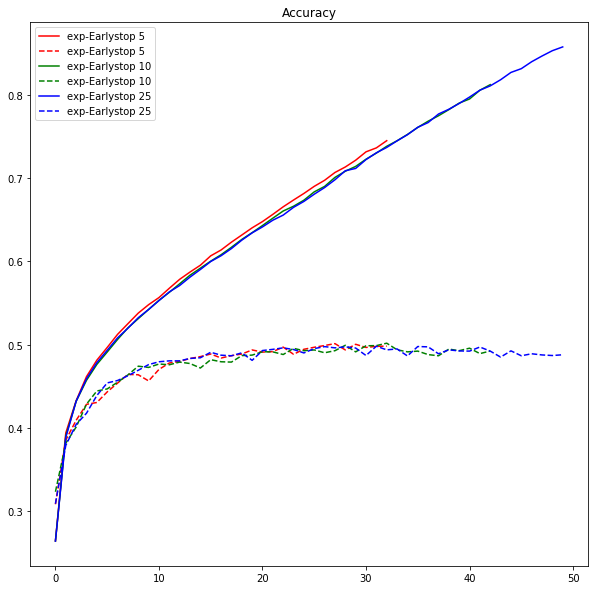

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(10,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], "--", label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-acc"])), results[cond]["valid-acc"], "--", label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### 結果討論

針對val_acc的earlystop，patience為5與patience為10或25的最終val_acc都差不多，

因此在這個案例下，將patience設定為5會比較省時